
<a href='https://huntsman.usu.edu/directory/jahangiry-pedram'> <img src="logo.jpg" /></a>
___
## Pedram Jahangiry

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year = 2021
month= 9
day = 2

In [3]:
my_date = datetime(year, month, day)
my_date.today()

datetime.datetime(2021, 9, 3, 9, 29, 3, 913312)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

9

In [5]:
my_date.weekday()
# Monday == 0 ... Sunday == 6 so 4 means Friday

3

In [6]:
my_date.isoweekday()

4

In [7]:
my_date.now()

datetime.datetime(2021, 9, 3, 9, 29, 5, 342879)

In [8]:
my_date.astimezone()

datetime.datetime(2021, 9, 2, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=61200), 'US Mountain Standard Time'))

In [9]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

4

In [10]:
b = my_date.now()
c = my_date.utcnow()
display(b,c)

datetime.datetime(2021, 9, 3, 9, 29, 9, 789936)

datetime.datetime(2021, 9, 3, 16, 29, 9, 789936)

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [11]:
import numpy as np

In [12]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

# OR

np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')
# datetime64 == datatime64[D] i.e. they both return the same result.

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [13]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[M]')

array(['2020-01', '2021-01'], dtype='datetime64[M]')

In [14]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2024-02-10', 2,dtype='datetime64[Y]')

array(['2021', '2023'], dtype='datetime64[Y]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [4]:
import pandas as pd

In [16]:
sd = pd.date_range('2020-01-01', periods=7, freq='M')
# dd = pd.DataFrame(sd)
sd

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
index = pd.date_range('2020-01-01', periods=7, freq='Y')
index

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [24]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index.dtype

dtype('<M8[ns]')

In [17]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index_1 = pd.DatetimeIndex(['2021-01-01', '2021-01-19'])
display(custom_index,custom_index_1) 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [18]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(['first day of the year', 'first day of school'], custom_index, ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [19]:
df.columns

Index(['Event'], dtype='object')

In [20]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [21]:
df.index.min()

Timestamp('2021-01-01 00:00:00')

In [22]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [23]:
df.index.argmax()

1

#### Pandas datareader

In [2]:
import pandas_datareader.data as web

In [5]:
start = pd.to_datetime('2019-01-01')
end   = pd.to_datetime('today')

In [6]:
Ticker = "TSLA AAPL".split(" ") 
Ticker

['TSLA', 'AAPL']

In [7]:
Stocks = web.DataReader(name= Ticker, data_source='yahoo', start=start, end= end)
Stocks.head()

Attributes  Adj Close                 Close                  High             \
Symbols          TSLA       AAPL       TSLA       AAPL       TSLA       AAPL   
Date                                                                           
2019-01-02  62.023998  38.382229  62.023998  39.480000  63.026001  39.712502   
2019-01-03  60.071999  34.559078  60.071999  35.547501  61.880001  36.430000   
2019-01-04  63.537998  36.034370  63.537998  37.064999  63.599998  37.137501   
2019-01-07  66.991997  35.954170  66.991997  36.982498  67.348000  37.207500   
2019-01-08  67.070000  36.639565  67.070000  37.687500  68.802002  37.955002   

Attributes        Low                  Open                 Volume  \
Symbols          TSLA       AAPL       TSLA       AAPL        TSLA   
Date                                                                 
2019-01-02  59.759998  38.557499  61.220001  38.722500  58293000.0   
2019-01-03  59.476002  35.500000  61.400002  35.994999  34826000.0   
2019-01-04  60.546001  35.950001  61.200001  36.132500  36970500.0   
2019-01-07  63.549999  36.474998  64.344002  37.174999  37756000.0   
2019-01-08  65.403999  37.130001  68.391998  37.389999  35042500.0   

Attributes               
Symbols            AAPL  
Date                     
2019-01-02  148158800.0  
2019-01-03  365248800.0  
2019-01-04  234428400.0  
2019-01-07  219111200.0  
2019-01-08  164101200.0

In [8]:
df= round(Stocks['Adj Close'],2)
df

Symbols,TSLA,AAPL
Date,,
2019-01-02,62.02,38.38
2019-01-03,60.07,34.56
2019-01-04,63.54,36.03
2019-01-07,66.99,35.95
2019-01-08,67.07,36.64
...,...,...
2021-08-30,730.91,153.12
2021-08-31,735.72,151.83
2021-09-01,734.09,152.51


In [35]:
import matplotlib.pyplot as plt

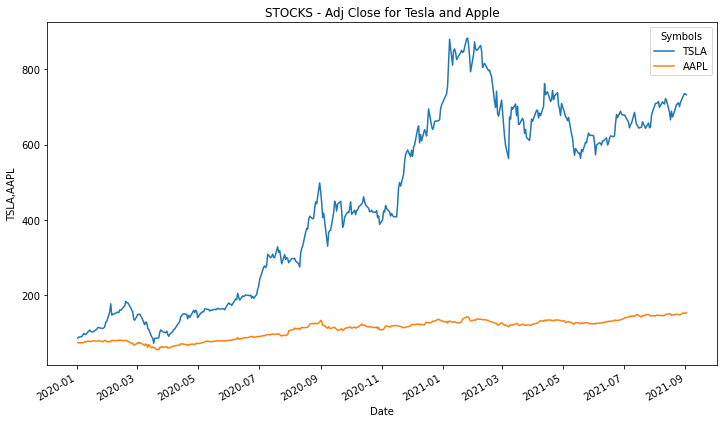

In [102]:
df.plot(figsize=(12,7))
plt.ylabel('TSLA,AAPL')
plt.title('STOCKS - Adj Close for Tesla and Apple')
plt.show()

In [88]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31',
               '2021-09-01', '2021-09-02'],
              dtype='datetime64[ns]', name='Date', length=422, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [9]:
df

Symbols,TSLA,AAPL
Date,,
2019-01-02,62.02,38.38
2019-01-03,60.07,34.56
2019-01-04,63.54,36.03
2019-01-07,66.99,35.95
2019-01-08,67.07,36.64
...,...,...
2021-08-30,730.91,153.12
2021-08-31,735.72,151.83
2021-09-01,734.09,152.51


In [106]:
# example: resampling data by month end frequency
# df.resample()
df.resample(rule='M').mean()

Symbols,TSLA,AAPL
Date,,
2020-01-31,105.730952,76.950476
2020-02-29,159.489474,76.934737
2020-03-31,111.820455,64.897727
2020-04-30,132.719524,67.356667
2020-05-31,159.885000,76.811500
2020-06-30,192.708636,85.743636
2020-07-31,292.028636,94.784545
2020-08-31,360.060000,116.513333
2020-09-30,413.495238,114.389524


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

<AxesSubplot:xlabel='Date'>

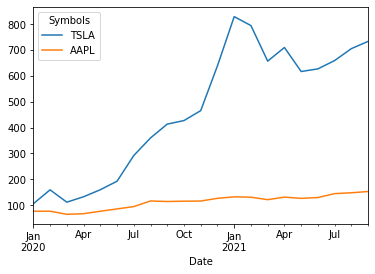

In [120]:
df.resample(rule='M').mean().plot()

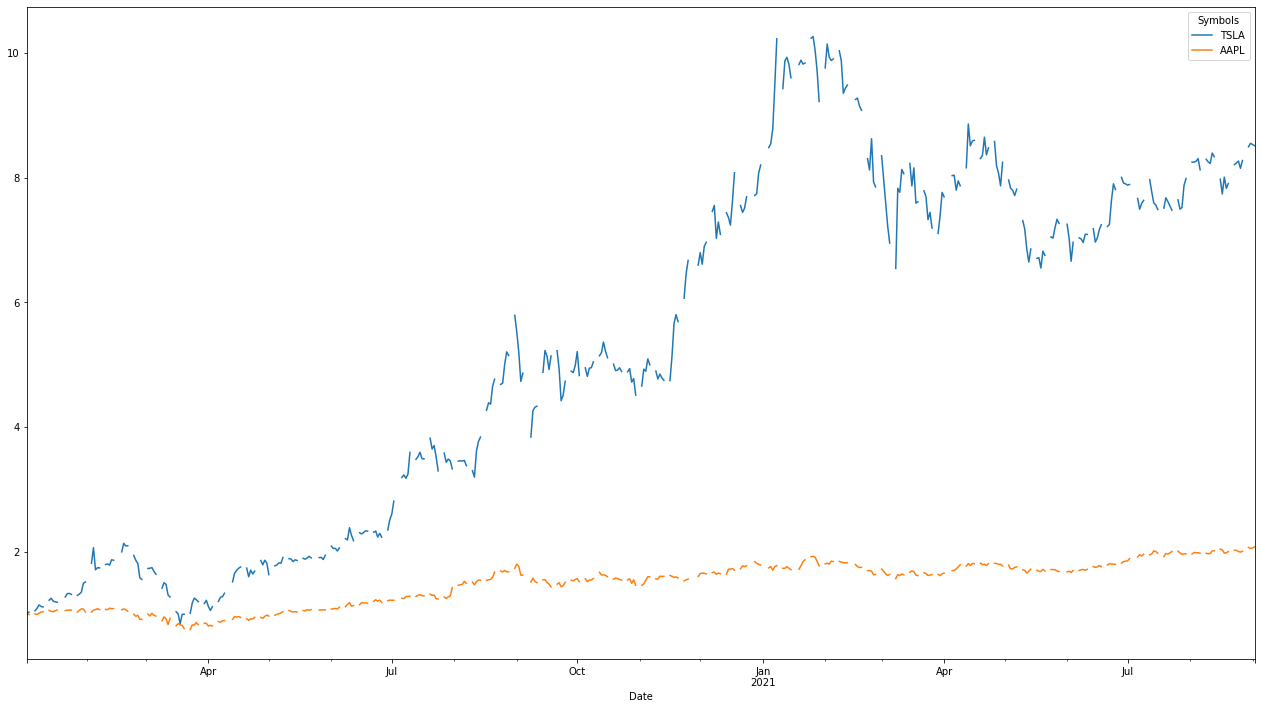

In [150]:
df.resample(rule='D').mean().apply(lambda x: x/x[0]).plot(figsize=(22,12))
plt.show()

<AxesSubplot:xlabel='Date'>

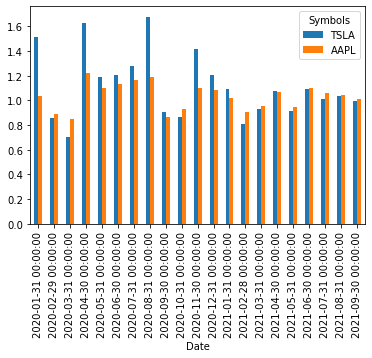

In [157]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]).plot.bar()

In [32]:
# DATA NORMALIZATION
df.resample(rule='M').apply(lambda x : (x-x.mean())/x.std()).plot(figsize=(12,6))

NameError: name 'df' is not defined

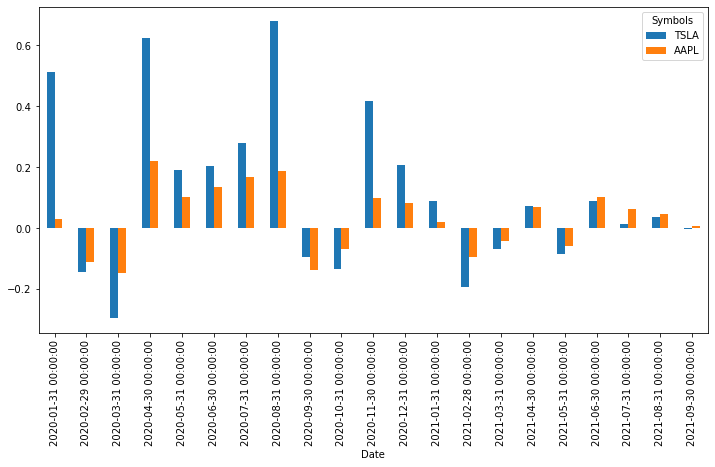

In [160]:
# df.resample(rule='M').apply(lambda x : x[-1]/x[0])
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [34]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2020-01-02,74.44
2020-01-03,73.72
2020-01-06,74.31
2020-01-07,73.96
2020-01-08,75.15


In [35]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2020-01-02,74.44,NaN,73.72
2020-01-03,73.72,74.44,74.31
2020-01-06,74.31,73.72,73.96
2020-01-07,73.96,74.31,75.15
2020-01-08,75.15,73.96,76.74


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [36]:
df.head()

Symbols,AAPL,TSLA
Date,,
2020-01-02,74.44,86.05
2020-01-03,73.72,88.60
2020-01-06,74.31,90.31
2020-01-07,73.96,93.81
2020-01-08,75.15,98.43


In [37]:
df.rolling(window=5).mean().head()

Symbols,AAPL,TSLA
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,74.316,91.44


In [39]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [40]:
df.head()

Symbols,AAPL,TSLA,TSLA_MA(30)
Date,,,
2020-01-02,74.44,86.05,NaN
2020-01-03,73.72,88.60,NaN
2020-01-06,74.31,90.31,NaN
2020-01-07,73.96,93.81,NaN
2020-01-08,75.15,98.43,NaN


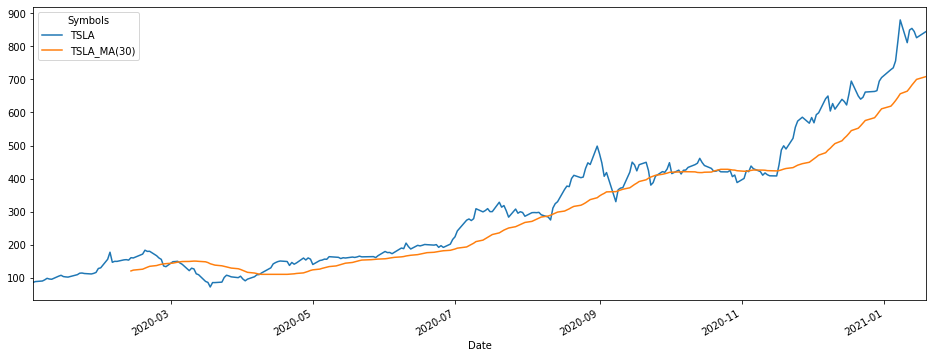

In [41]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [42]:
df['AAPL'].head()

Date
2020-01-02    74.44
2020-01-03    73.72
2020-01-06    74.31
2020-01-07    73.96
2020-01-08    75.15
Name: AAPL, dtype: float64

In [43]:
df['AAPL'].expanding().mean().head()

Date
2020-01-02    74.440000
2020-01-03    74.080000
2020-01-06    74.156667
2020-01-07    74.107500
2020-01-08    74.316000
Name: AAPL, dtype: float64

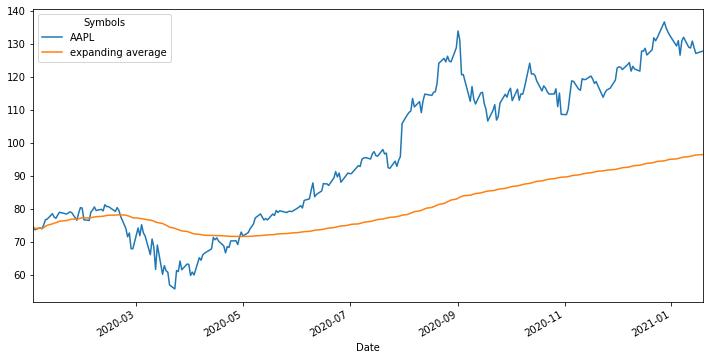

In [44]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()